## By open source Python package 

The **mdptoolbox** in Python provides classes and functions for the resolution of descrete-time Markov Decision Processes. The algorithms provided includes backwards induction, linear programming, policy iteration, q-learning and value iteration.

The **quantecon** python library consists of a number of modules among which is the one for solving dynamic programs (Markov decision processes) with finite states and actions.

First install quantecon by opening a terminal prompt and typing: ** pip install quantecon**

In [1]:
import quantecon as qe   # cmd: pip install quantecon

### Example

Consider the following example, taken from Puterman (2005), Section 3.1, pp.33-35.
<img src="MDP example.png">

    Set of states S = {0, 1}

    Set of actions A = {0, 1}

    Set of feasible state-action pairs SA = {(0, 0), (0, 1), (1, 0)}

    Rewards r(s, a):

        r(0, 0) = 5, r(0, 1) =10, r(1, 0) = -1

    Transition probabilities q(s_next|s, a):

    Action0    q(0|0, 0) = 0.5, q(1|0, 0) = 0.5,  q(0|1, 0) = 0,  q(1|1, 0) = 1,
    Action1    q(0|0, 1) = 0, q(1|0, 1) = 1.

    Discount factor = 0.95

Creating a `DiscreteDP` instance.

This approach uses the product set S x A as the domain and treat action 1 as yielding a reward negative infinity at state 1.

In [2]:
R1 = [[5, 10], [-1, -float('inf')]]   # product set  S x A 
Q = [[(0.5, 0.5), (0, 1)], [(0, 1), (0.2, 0.8)]]
beta = 0.95                                  # Discount factor
ddp = qe.markov.ddp.DiscreteDP(R1, Q, beta)

In [3]:
res = ddp.solve(method='value_iteration', v_init=[0, 0],epsilon=10**(-5))
print( " Optimal policy function = ", res.sigma)   
print(" Optimal value function = ",res.v)     
print(" Number of iterations =", res.num_iter)   

 Optimal policy function =  [0 0]
 Optimal value function =  [ -8.57137463 -19.99994606]
 Number of iterations = 250


## Dynamic Programming  - value iteration

### The essential idea: 
** Value of state i (unknown) =  immediate reward for state i (known) + E[discounted reward if acting optimally] **

### How to get the true value of each state ?
①Assign each state a random value

②Update each states V based on :<img src="VI1.png">

③ If no value changes by more than the maximum tolerance, halt.

④ Extract the final action.

<img src="VI.png">

 Optimal policy function =  [ 0.  0.]
 Optimal value function =  [ -8.57124383 -19.99981526]
 Number of iterations = 226


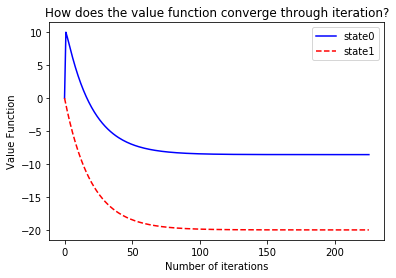

In [4]:
import numpy as np
import matplotlib.pyplot as plt
num_state = 2 # Number of STATES
num_action = 2  # Number of ACTIONS
tol = 10**(-5) # Maximum tolerance between two iterations of the value function until we say that the value function converged

R = [[5, -1], [10, -float('inf')]]     #Income after each action;  product set A x S
valuestate=[[] for i in range(num_state)]
value_old = np.ones(num_state) # Initialize the value function guess (current iteration)
value_new = np.zeros(num_state) # Initialize the value function guess (next iteration)
policy = np.zeros(num_state) # Initialize the policy function guess
ctr = 0 # Counter for the iterations until convergence

while(np.max(np.abs(value_old-value_new)) > tol): # Computing the max difference between value function iterations
    np.copyto(value_old,value_new) # Replace value_old by value_new
    for i in np.arange(num_state): # Update the value function for each possible
        valuestate[i].append(value_old[i])
        aa = np.ones(num_action)
        for j in np.arange(num_action):
            aa[j]=R[j][i]+(Q[j][i]@value_old)*beta
        value_new[i] = np.max(aa)
        policy[i] = np.argmax(aa)  # Find the ACTION to maximize value
        
    ctr = ctr+1 # Increment counter
    
    
print( " Optimal policy function = ", policy)   # Optimal policy function
print(" Optimal value function = ",value_new)       # Optimal value function
print(" Number of iterations =", ctr)   # Number of iterations
plt.plot(valuestate[0],'b',valuestate[1],'r--')
plt.legend(['state0','state1'], loc = 0)  
plt.xlabel('Number of iterations')
plt.ylabel('Value Function')
plt.title("How does the value function converge through iteration?")
plt.show()